<a href="https://colab.research.google.com/github/davione112/Collection_Preprocessing/blob/master/BikeSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**




In [5]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn import tree

# **Dataset**

In [6]:
url1 = 'https://raw.githubusercontent.com/davione112/work/master/train.csv'
url2 = 'https://raw.githubusercontent.com/davione112/work/master/test.csv'
train = pd.read_csv(url1)
test = pd.read_csv(url2)

- Brief summaries:


In [3]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [10]:
#@title Check for missing data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [12]:
#@title Combine train and test into a dataset.
dataset = train.append(test)
dataset.reset_index(inplace=True)
dataset.drop('index',inplace=True,axis=1)
dataset = dataset.fillna(0)


In [13]:
dataset.tail(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17374,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0
17375,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0
17376,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0.0,0.0,0.0
17377,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0.0,0.0,0.0
17378,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,0.0,0.0,0.0


# Understand variables


In [14]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual        float64
registered    float64
count         float64
dtype: object

Text(0.5, 1.0, 'Windspeed')

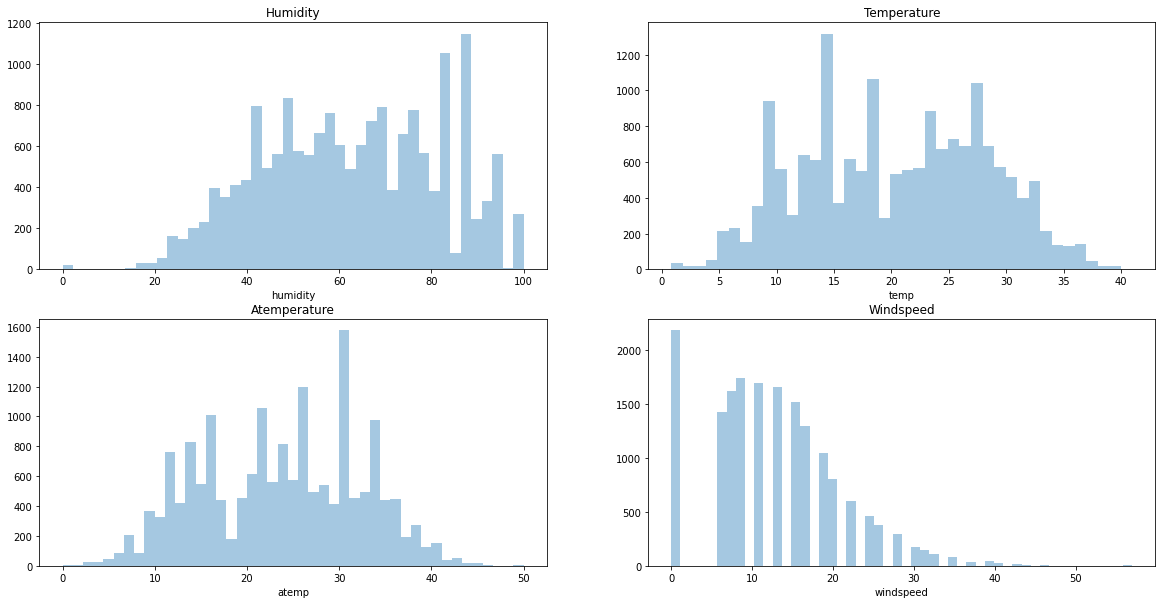

In [ ]:
#@title Distributions of continuous variables
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sb.distplot(dataset["humidity"],kde=False,ax=ax[0,0])
sb.distplot(dataset["temp"],kde=False,ax=ax[0,1])
sb.distplot(dataset["atemp"],kde=False,ax=ax[1,0])
sb.distplot(dataset["windspeed"],kde=False,ax=ax[1,1])

ax[0,0].set_title("Humidity")
ax[0,1].set_title("Temperature")
ax[1,0].set_title("Atemperature")
ax[1,1].set_title("Windspeed")

Text(0.5, 1.0, 'Workingday')

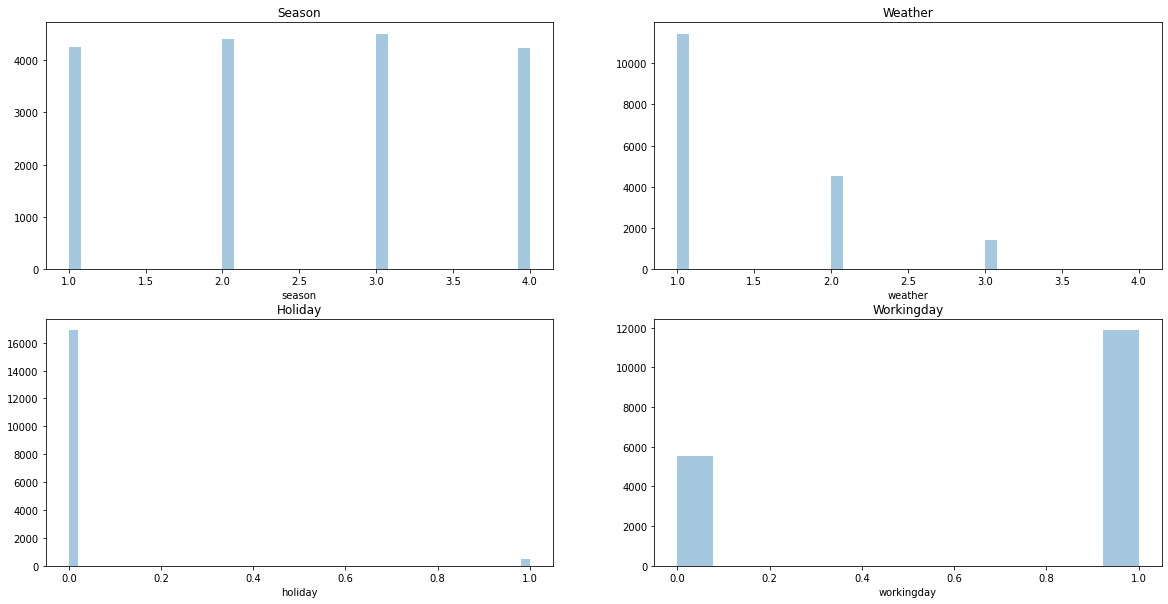

In [ ]:
#@title Distributions of categorical variables
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,10)
sb.distplot(dataset["season"],kde=False,ax=ax[0,0])
sb.distplot(dataset["weather"],kde=False,ax=ax[0,1])
sb.distplot(dataset["holiday"],kde=False,ax=ax[1,0])
sb.distplot(dataset["workingday"],kde=False,ax=ax[1,1])

ax[0,0].set_title("Season")
ax[0,1].set_title("Weather")
ax[1,0].set_title("Holiday")
ax[1,1].set_title("Workingday")

In [15]:
#@title Hour trending
# convert 'datetime' column to datetime datatype
dataset['datetime'] = pd.to_datetime(dataset['datetime'],format='%Y-%m-%d %H:%M:%S')

In [16]:
# add 'hour' and 'date' columns to dataset
hours = []
for i in range(len(dataset['datetime'])):
  hours.append(dataset['datetime'][i].hour)
dataset["hour"] = hours
dates = []
for i in range(len(dataset['datetime'])):
  dates.append(dataset['datetime'][i].day)
dataset["date"] = dates

In [18]:
# divide dataset into train and test
dataset[['season','holiday','weather','workingday']] = dataset[['season','holiday','weather','workingday']].astype('category')
dataset.head(5)
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date']) >=20]

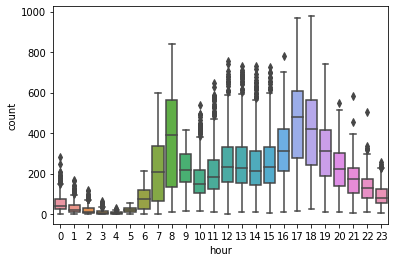

In [19]:
# boxplot bike rentals per hour in train set.
sb.boxplot(x='hour',y='count',data=train)

Text(0.5, 1.0, 'Registered per hour')

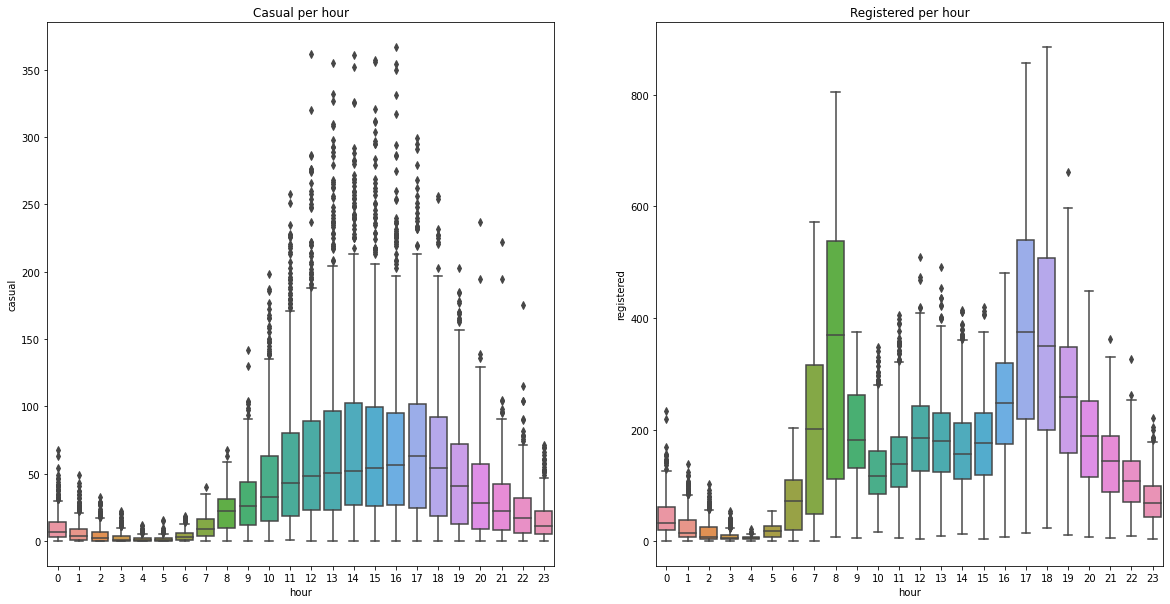

In [20]:
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='hour',y='casual',data=train,ax=axis1)
sb.boxplot(x='hour',y='registered',data=train,ax=axis2)

axis1.set_title('Casual per hour')
axis2.set_title('Registered per hour')

Text(0.5, 1.0, 'Bike rentals count per hours')

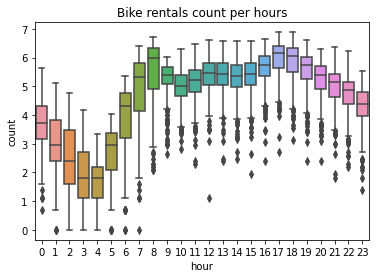

In [21]:
sb.boxplot('hour',np.log(train['count']),data=train,)
plt.title('Bike rentals count per hours')

In [22]:
#@title Daily trend
# extracting days of week from datetime
days = []
for i in range(len(dataset['datetime'])):
  days.append(dataset['datetime'][i].weekday())
dataset['day'] = days

In [23]:
dataset.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                float64
hour                   int64
date                   int64
day                    int64
dtype: object

In [24]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

Text(0.5, 1.0, 'Registered per weekday')

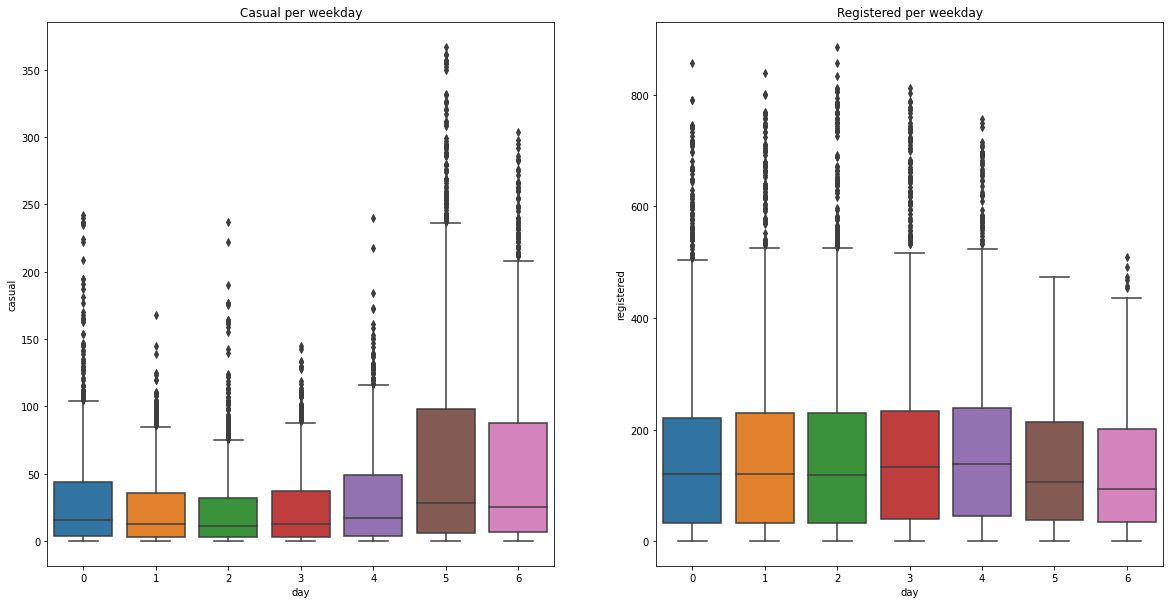

In [41]:
# Boxplot shows registered and casual users’ demand over days.
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='day',y='casual',data=train,ax=axis1)
sb.boxplot(x='day',y='registered',data=train,ax=axis2)

axis1.set_title('Casual per weekday')
axis2.set_title('Registered per weekday')

Text(0.5, 1.0, 'Registered per weather')

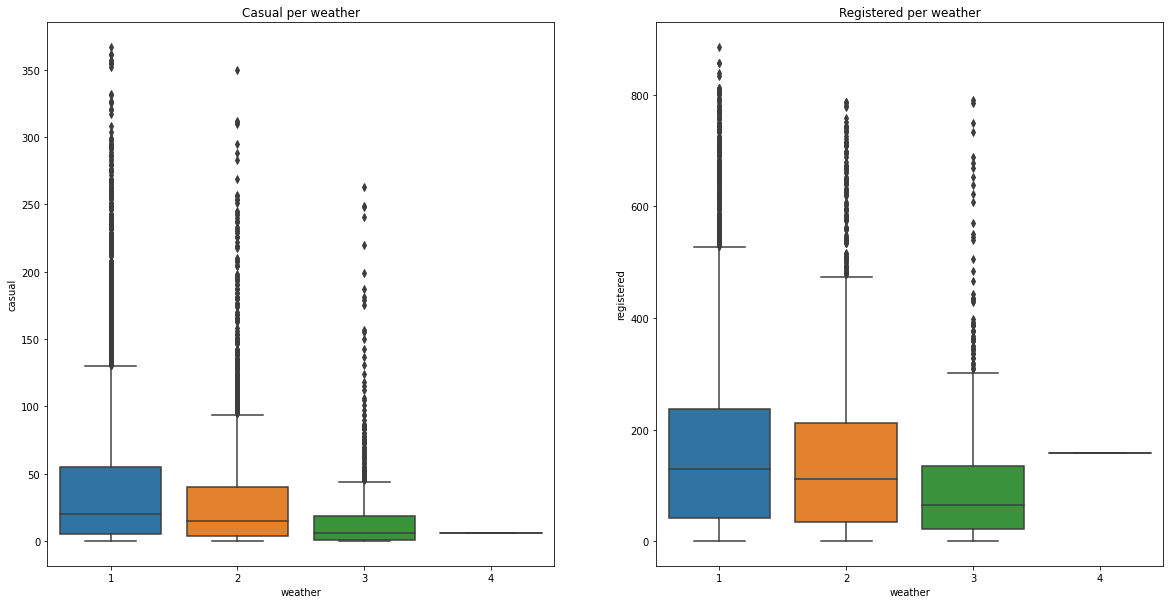

In [25]:
#@title Weather trending
# Boxplot shows registered and casual users’ demand each weather.
fig, (axis1,axis2) = plt.subplots(1,2)
fig.set_size_inches(20,10)
sb.boxplot(x='weather',y='casual',data=train,ax=axis1)
sb.boxplot(x='weather',y='registered',data=train,ax=axis2)

axis1.set_title('Casual per weather')
axis2.set_title('Registered per weather')

In [26]:
#@title Comparision of bike rentals between 2011 and 2012
# Extract 'year' from datetime.
years = []
for i in range(len(dataset['datetime'])):
  years.append(dataset['datetime'][i].year)
dataset['year'] = years

In [ ]:
# convert variables to 'category'
dataset[['hour','date','day','year']] = dataset[['hour','date','day','year']].astype('category')
dataset.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                float64
hour                category
date                category
day                 category
year                category
dtype: object

In [55]:
# divide again dataset into train and test
train = dataset[pd.to_numeric(dataset['date']) < 20]
test = dataset[pd.to_numeric(dataset['date'])>=20]

Text(0.5, 1.0, 'bike rentals between 2011 and 2012')

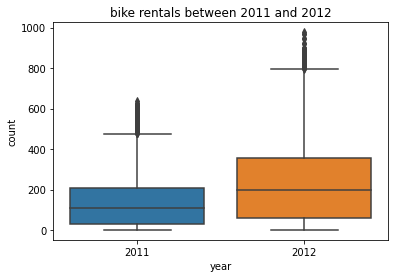

In [33]:
# Boxplot of bike rentals between '2011' and '2012'
sb.boxplot(x='year',y='count',data=train)
plt.title('bike rentals between 2011 and 2012')

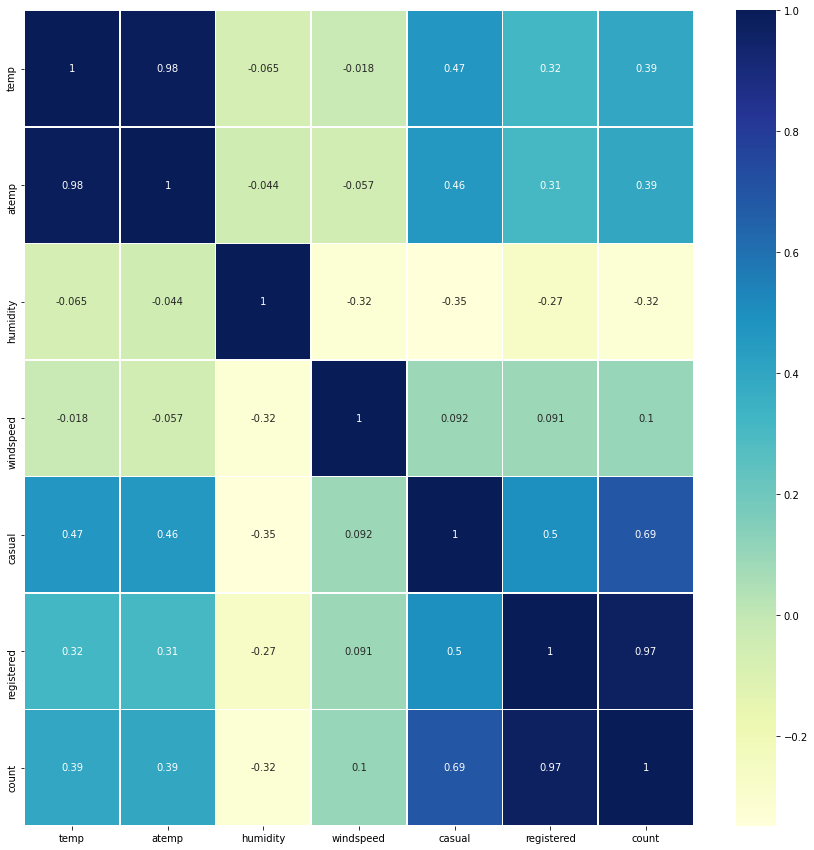

In [34]:
#@title Correlation matrix of continuous variables
x = train.corr()
plt.figure(figsize=(15,15))
sb.heatmap(x, cmap='YlGnBu', annot=True, annot_kws={"size":10}, linewidths=0.5)

# **Preprocessing**

In [56]:
train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,day,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,0,1,5,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,1,1,5,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2,1,5,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,3,1,5,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,4,1,5,2011


In [57]:
test.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,day,year
10886,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.0,0.0,0.0,0,20,3,2011
10887,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,0.0,0.0,1,20,3,2011
10888,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,0.0,0.0,2,20,3,2011
10889,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,0.0,0.0,3,20,3,2011
10890,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,0.0,0.0,4,20,3,2011


In [58]:
test.reset_index(drop=True)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,day,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0.0,0.0,0.0,0,20,3,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,0.0,0.0,1,20,3,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0.0,0.0,0.0,2,20,3,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,0.0,0.0,3,20,3,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0.0,0.0,0.0,4,20,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0,19,31,0,2012
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,0.0,0.0,0.0,20,31,0,2012
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,0.0,0.0,0.0,21,31,0,2012
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,0.0,0.0,0.0,22,31,0,2012


In [59]:
train.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual               float64
registered           float64
count                float64
hour                category
date                category
day                 category
year                category
dtype: object